#  Comprehensive Heart Disease Prediction Guide
## Using Decision Tree Classifiers with Hyperparameter Tuning

### 1. Introduction
In this project, we will build a machine learning model to predict whether a patient has heart disease. We will use the **Decision Tree** algorithm, which mimics human decision-making by creating a flowchart of rules based on medical data.

### 2. The Workflow
1.  **Data Loading:** Import the Cleveland Heart Disease dataset.
2.  **EDA (Exploratory Data Analysis):** Understand the distribution of data and check for quality issues (nulls/duplicates).
3.  **Preprocessing:** Convert categorical medical codes into a format the machine understands (One-Hot Encoding).
4.  **Model Selection:** Use a Decision Tree Classifier.
5.  **Hyperparameter Tuning:** Use `GridSearchCV` to mathematically determine the optimal tree depth and splitting criteria to prevent overfitting.
6.  **Evaluation:** Analyze performance using Accuracy, Precision, Recall, and F1-Score.
7.  **Visualization:** Visualize the actual Decision Tree logic and Feature Importance.

In [138]:
# --- STEP 1: Import Libraries ---

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 3. Loading the Data and Initail Exploration
The dataset consists of 14 columns. The `target` column is what we want to predict (1 = Disease, 0 = No Disease).

In [139]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Display the first 5 rows to understand the structure
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [140]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
# Statistical summary
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4. Data Cleaning
Real-world data is rarely clean. We must check for:
1.  **Missing Values:** Can crash the model.
2.  **Duplicates:** Can bias the model (giving too much weight to repeated examples).

In [142]:
# Check for Null values
print("--- Null Values ---")
print(data.isnull().sum())

--- Null Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [143]:
# Check for duplicates
print(f"\nNumber of duplicate rows found: {data.duplicated().sum()}")
print('------Duplicated row------')
print(data[data.duplicated()==True])

# Remove duplicates if any exist
data.drop_duplicates(inplace=True)
print("\nDuplicates removed.")


Number of duplicate rows found: 1
------Duplicated row------
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  

Duplicates removed.


### 5. Feature Engineering (One-Hot Encoding)
**Why do this?**
Columns like `cp` (Chest Pain) contain numbers `0, 1, 2, 3`. However, these are **categories**, not quantities. Pain type 3 is not "mathmatically greater" than pain type 0.

To fix this, we use **One-Hot Encoding**, which splits these into separate binary columns (e.g., `cp_0`, `cp_1`, `cp_2`).

In [144]:
# Columns to be encoded
categorical_cols = ['cp', 'restecg', 'thal']

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True,dtype = int)

# Display new columns to verify encoding
print("Data columns after encoding:")
data.head()

Data columns after encoding:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


### 6. Train-Test Split
We hold back **30%** of our data to test the model later. This ensures we are evaluating how the model performs on **unseen patients**, simulating a real-world scenario.

In [145]:
# Separate Features (X) and Target (Y)
X = data.drop('target', axis=1)
Y = data['target']

# Perform the split (70% Training, 30% Testing)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=23)

print(f"Training samples: {x_train.shape}")
print(f"Testing samples: {x_test.shape}")

Training samples: (211, 18)
Testing samples: (91, 18)


### 7. Hyperparameter Tuning (GridSearchCV)
A default Decision Tree often creates a huge, messy tree that memorizes the training data (Overfitting).

We use `GridSearchCV` to test thousands of tree variations to find the "Goldilocks" tree: not too simple, not too complex.

**Parameters we are tuning:**
* `max_depth`: How deep can the tree grow? (Shallow trees prevent overfitting).
* `min_samples_split`: Minimum samples required to create a new branch.
* `criterion`: The math used to measure the quality of a split ('gini' or 'entropy').

In [146]:
# 1. Define the model
dt_model = DecisionTreeClassifier(random_state=23)

# 2. Define the 'grid' of parameters to test
param_grid = {
    'max_depth': range(1,10),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 3. Initialize Grid Search with Cross-Validation (cv=5)
# cv=5 means it splits data into 5 parts and rotates testing to ensure reliability
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# 4. Run the search (Fit on Training Data)
print("Tuning model... ")
grid_search.fit(x_train, y_train)

# 5. Retrieve the best parameters
print("Best Parameters:", grid_search.best_params_)

Tuning model... 
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


### 8. Model Evaluation
Now we use the "Best Tree" found by the Grid Search to predict our Test Set.

In [147]:
# Use the best estimator found by GridSearch
final_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = final_model.predict(x_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

# Display detailed classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Model Accuracy: 81.32%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.84      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Understanding the Confusion Matrix
In medical diagnosis, **False Negatives** (Top Right of matrix) are dangerous. This means the model said "Healthy" but the patient actually had heart disease.

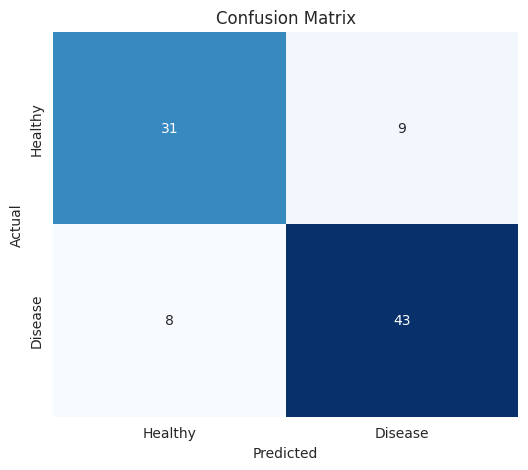

In [148]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 9. Visualizing the Decision Tree
We can actually look at the flowchart the computer created.
* **X[i] <= value:** The question being asked at that node.
* **Gini:** The impurity (lower is better/cleaner split).
* **Samples:** How many patients reached this step.

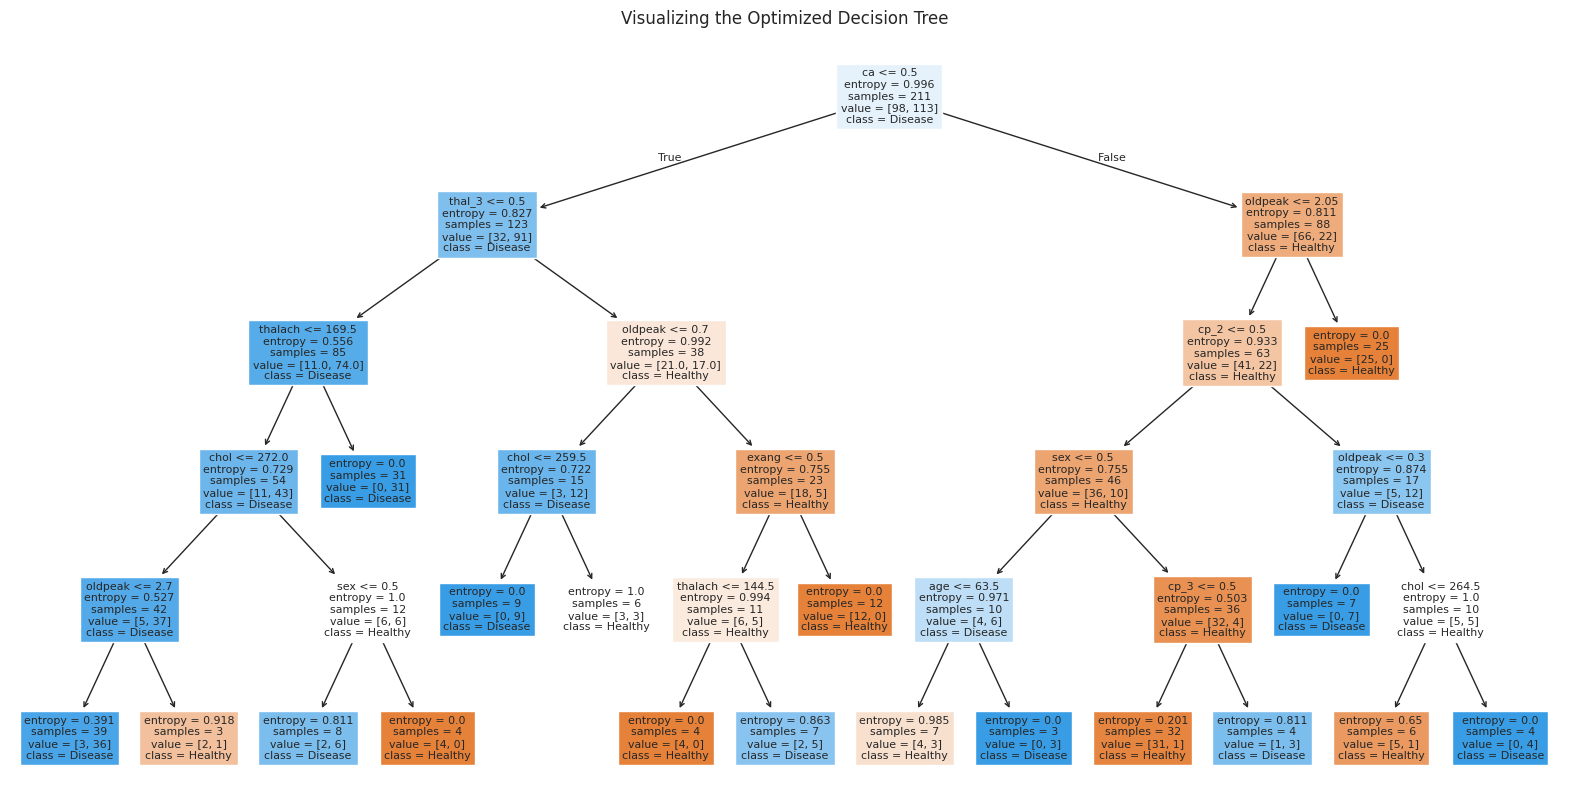

In [149]:
plt.figure(figsize=(20, 10))
plot_tree(final_model,
          feature_names=X.columns,
          class_names=['Healthy', 'Disease'],
          filled=True)
plt.title("Visualizing the Optimized Decision Tree")
plt.show()

### 10. Feature Importance
Which medical attributes contributed most to the diagnosis? This chart shows us the most influential factors (e.g., Chest Pain, Thalassemia, Number of Vessels).

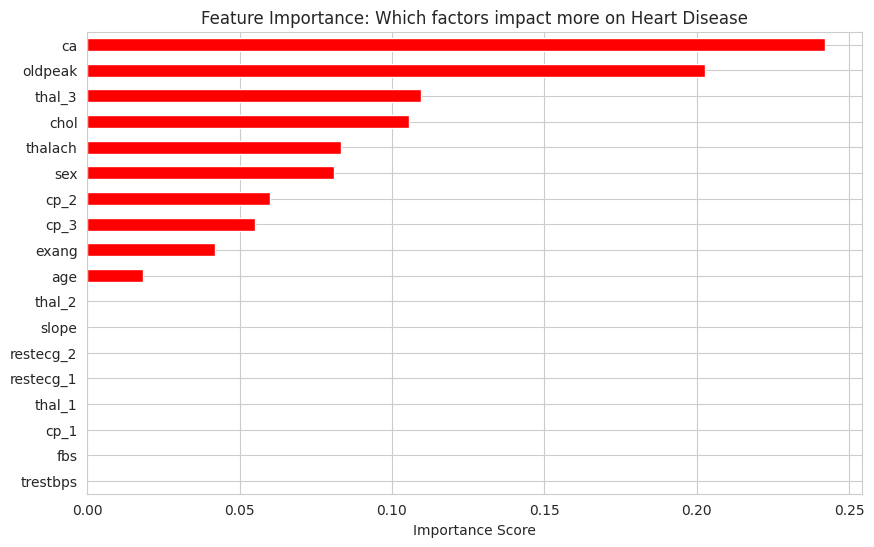

In [150]:
# Get feature importance values
feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)

# Sort them for better visualization
feature_importances = feature_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='red')
plt.title('Feature Importance: Which factors impact more on Heart Disease')
plt.xlabel('Importance Score')
plt.show()